In [ ]:
!pip install fiftyone

  Obtaining dependency information for fiftyone from https://files.pythonhosted.org/packages/10/f1/aa6eb02fda4640fde27824af6a3c31b09ca0634afa095ed97ac6c8ddf868/fiftyone-0.22.1-py3-none-any.whl.metadata
  Obtaining dependency information for aiofiles from https://files.pythonhosted.org/packages/c5/19/5af6804c4cc0fed83f47bff6e413a98a36618e7d40185cd36e69737f3b0e/aiofiles-23.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for argcomplete from https://files.pythonhosted.org/packages/1e/05/223116a4a5905d6b26bff334ffc7b74474fafe23fcb10532caf0ef86ca69/argcomplete-3.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for boto3 from https://files.pythonhosted.org/packages/c0/67/4d23a38313d7b37892a6d9c9260809f1a2f5a37feaf6f13da0aa27f57d6d/boto3-1.28.63-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224fdd4d8307c9e48cbddc46c18b515fefc0f1abbe/cachetools-5.3.1-py3-none-any.

In [ ]:
# install for AWS
!pip install torch
!pip install pandas
!pip install scikit-image
!pip install scikit-learn
!pip install matplotlib
!pip install torchvision

In [92]:
import os
import torch
import pandas as pd
import tarfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision
import random
import warnings
import boto3

from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils, models, datasets

warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

# Load and Split

In [ ]:
# use data directly from s3 without pulling onto EC2

In [ ]:
path = '../data/'

In [71]:
df = pd.read_csv(f'{path}annotations.csv')
classes = df['class1'].unique()

idx_to_class = {i:j for i, j in enumerate(classes)}
class_to_idx = {value:key for key,value in idx_to_class.items()}

In [ ]:
# # pull the data and untar it

# facet_dir = '../data/FACET'
# if not os.path.exists(facet_dir):
#     os.makedirs(facet_dir)

# # List of tar files to extract
# tar_files = [
#     'An-eiAKujFQ7M85gO7i3_GRYWn8rEQV3YkAHJj3r6-VnBGtZaMXHcbL0B6SzheQC0G4hiRgrrX2Q',
#     'An93bEI19SVh7AcucvBCxtlNQbmFu7VHA5F2ohTup8oD_2UqWhoGWfUuTxH7fx7INUtl5g9PssYR',
#     'An_dQ-jGpseAUdnVrzTm6Fi6SDH5Fqs1hoopIrJbVZ2og71GwYgu3G2bgmtKrjrP8l69-MUsttDg'
# ]

# # Loop through each tar file
# for tar_file in tar_files:
#     # Extract the tar file to a temporary directory
#     with tarfile.open(f'{path}{tar_file}', 'r') as tar:
#         temp_dir = f'./temp_{tar_file}'
#         if not os.path.exists(temp_dir):
#             os.makedirs(temp_dir)
#         tar.extractall(path=temp_dir)
    
#     # Move the JPG files to the FACET directory
#     for root, dirs, files in os.walk(temp_dir):
#         for file in files:
#             if file.endswith('.jpg'):
#                 jpg_file_path = os.path.join(root, file)
#                 shutil.move(jpg_file_path, os.path.join(facet_dir, file))
    
#     # Clean up the temporary directory
#     shutil.rmtree(temp_dir)


In [ ]:
# count number of files
# !find $facet_dir -type f | wc -l

In [78]:
df.iloc[0][6:]

gender_presentation_masc          0
gender_presentation_fem           1
gender_presentation_non_binary    0
gender_presentation_na            0
skin_tone_1                       2
skin_tone_2                       3
skin_tone_3                       0
skin_tone_4                       0
skin_tone_5                       0
skin_tone_6                       0
skin_tone_7                       0
skin_tone_8                       0
skin_tone_9                       0
skin_tone_10                      0
skin_tone_na                      0
age_presentation_young            0
age_presentation_older            0
age_presentation_middle           1
age_presentation_na               0
hair_color_brown                  0
hair_color_blonde                 1
hair_color_grey                   0
hair_color_na                     0
hair_color_black                  0
hair_color_colored                0
hair_color_red                    0
hairtype_coily                    0
hairtype_dreadlocks         

In [108]:
idx_to_class

{0: 'gymnast',
 1: 'boatman',
 2: 'lifeguard',
 3: 'backpacker',
 4: 'lawman',
 5: 'dancer',
 6: 'laborer',
 7: 'patient',
 8: 'basketball_player',
 9: 'nurse',
 10: 'singer',
 11: 'motorcyclist',
 12: 'astronaut',
 13: 'fireman',
 14: 'referee',
 15: 'speaker',
 16: 'guitarist',
 17: 'repairman',
 18: 'craftsman',
 19: 'guard',
 20: 'painter',
 21: 'doctor',
 22: 'farmer',
 23: 'drummer',
 24: 'climber',
 25: 'disk_jockey',
 26: 'soccer_player',
 27: 'student',
 28: 'soldier',
 29: 'cheerleader',
 30: 'flutist',
 31: 'runner',
 32: 'retailer',
 33: 'machinist',
 34: 'reporter',
 35: 'horseman',
 36: 'tennis_player',
 37: 'computer_user',
 38: 'carpenter',
 39: 'seller',
 40: 'skateboarder',
 41: 'gardener',
 42: 'waiter',
 43: 'prayer',
 44: 'ballplayer',
 45: 'sculptor',
 46: 'teacher',
 47: 'electrician',
 48: 'hairdresser',
 49: 'judge',
 50: 'trumpeter',
 51: 'bartender'}

In [ ]:
batch_size = 32
learning_rate = 0.001
num_classes = 52
num_epochs = 1


# Load CSV annotations and split data
csv_file = 's3:/annotations/annotations.csv'??
image_dir = 's3://FACET'??

In [105]:
class CustomDataset(Dataset):
    def __init__(self, split_data, image_dir, transform=None):
        self.data = split_data
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        img_name = os.path.join(self.image_dir, self.data.iloc[idx, 2])
        image = Image.open(img_name)
        annotations = self.data.iloc[idx, 6:]  # Assuming annotations are in the 6th column
        annotations = np.array([annotations], dtype = np.float16).reshape(-1, 1)
        label = class_to_idx[self.data.iloc[idx, 3]]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label), torch.from_numpy(annotations)

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


data = pd.read_csv(csv_file)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Create custom datasets and data loaders
train_dataset = CustomDataset(split_data=train_data, image_dir=image_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CustomDataset(split_data=test_data, image_dir=image_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

val_dataset = CustomDataset(split_data=val_data, image_dir=image_dir, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


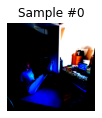

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


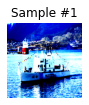

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


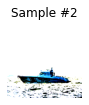

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


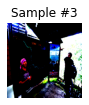

In [5]:

fig = plt.figure()

for i, sample in enumerate(train_dataset):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(np.transpose(sample[0], [1,2,0]))
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.show()
    if i == 3:
        break

# Model

In [6]:
device = torch.device('mps')
# Define your smaller ResNet student model
# Deeper neural network class to be used as teacher:
class DeepNN(nn.Module):
    def __init__(self, num_classes=52):
        super(DeepNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(131072, 512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Lightweight neural network class to be used as student:
class LightNN(nn.Module):
    def __init__(self, num_classes=52):
        super(LightNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(65536, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    
# Define loss functions
criterion_teacher = nn.CrossEntropyLoss()  # Loss for teacher model
criterion_student = nn.KLDivLoss()  # Knowledge distillation loss

# Instantiate the teacher and student models
teacher_model = DeepNN(num_classes=num_classes).to(device)
student_model = LightNN(num_classes=num_classes).to(device)  # Adjust num_classes as needed


# Define optimizer for the student model
optimizer_student = optim.Adam(student_model.parameters(), lr=learning_rate)
teacher_optimizer = optim.Adam(teacher_model.parameters(), lr=learning_rate)


# Train


In [7]:
# Training loop
num_epochs = 5  # Adjust as needed
for epoch in range(num_epochs):
    student_model.train()
    for images, labels, annotations in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_student.zero_grad()
        teacher_optimizer.zero_grad()
        
        # Forward pass
        teacher_outputs = teacher_model(images).to(device)
        student_outputs = student_model(images).to(device)
        
        # Compute loss for knowledge distillation
        kd_loss = criterion_student(
            torch.log_softmax(student_outputs / 5, dim=1),  # Apply temperature scaling
            torch.softmax(teacher_outputs / 5, dim=1)  # Apply temperature scaling
        )
        
        # Compute regular cross-entropy loss
        ce_loss = criterion_teacher(student_outputs, labels)
        
        # Combine the two losses with a weighting factor (alpha)
        alpha = 0.5  # Adjust as needed
        total_loss = alpha * kd_loss + (1 - alpha) * ce_loss
        
        total_loss.backward()
        optimizer_student.step()
        teacher_optimizer.step()

   # Validation
    student_model.eval()
    teacher_model.eval()
    val_loss_student = 0.0
    val_predictions_student = []
    val_targets_student = []
    
    val_loss_teacher = 0.0
    val_predictions_teacher = []
    val_targets_teacher = []
    
    with torch.no_grad():
        for images, labels, annotations in val_loader:
            images, labels = images.to(device), labels.to(device)
            # Forward pass
            student_outputs = student_model(images)
            teacher_outputs = teacher_model(images)
            
            # Compute cross-entropy loss for validation
            student_loss = criterion_teacher(student_outputs, labels)
            teacher_loss = criterion_teacher(teacher_outputs, labels)
            
            val_loss_student += student_loss.item()
            val_loss_teacher += teacher_loss.item()
            
            # Store predictions and ground truth labels for metrics
            val_predictions_student.extend(torch.argmax(student_outputs, dim=1).cpu().numpy())
            val_predictions_teacher.extend(torch.argmax(teacher_outputs, dim=1).cpu().numpy())

            val_targets_student.extend(labels.cpu().numpy())
            val_targets_teacher.extend(labels.cpu().numpy())


    # Calculate validation accuracy
    val_accuracy_student = accuracy_score(val_targets_student, val_predictions_student)
    val_accuracy_teacher = accuracy_score(val_targets_teacher, val_predictions_teacher)
    val_recall_student = recall_score(val_targets_student, val_predictions_student, average='weighted')
    val_recall_teacher = recall_score(val_targets_teacher, val_predictions_teacher, average='weighted')
    
    # Print validation results for this epoch
    print(f'Epoch [{epoch+1}/{num_epochs}]'
          f' Teacher Loss: {val_loss_teacher / len(val_loader):.4f}'
          f' Teacher Accuracy: {val_accuracy_teacher:.4f}'
          f' Student Loss: {val_loss_student / len(val_loader):.4f}'
          f' Student Accuracy: {val_accuracy_student:.4f}')

# Save the trained student model for future inference
# torch.save(student_model.state_dict(), 'student_model.pth')


Epoch [1/5] Teacher Loss: 3.1680 Teacher Accuracy: 0.1939 Student Loss: 2.0362 Student Accuracy: 0.4565
Epoch [2/5] Teacher Loss: 2.4605 Teacher Accuracy: 0.3443 Student Loss: 0.8468 Student Accuracy: 0.7942
Epoch [3/5] Teacher Loss: 1.9127 Teacher Accuracy: 0.4867 Student Loss: 0.4018 Student Accuracy: 0.9000
Epoch [4/5] Teacher Loss: 1.3793 Teacher Accuracy: 0.6172 Student Loss: 0.3178 Student Accuracy: 0.9194
Epoch [5/5] Teacher Loss: 1.0010 Teacher Accuracy: 0.7146 Student Loss: 0.2600 Student Accuracy: 0.9281


In [8]:
torch.save(student_model.state_dict(), 'student_model2.pth')

In [9]:
torch.save(teacher_model.state_dict(), 'teacher_model2.pth')

In [10]:
accuracy_score(val_targets_student, val_predictions_student)

0.9280539242396723

In [11]:
accuracy_score(val_targets_teacher, val_predictions_teacher)

0.714617263021937

In [ ]:
val_loss_student / len(val_loader)

In [ ]:
val_loss_teacher / len(val_loader)

# Evaluate

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


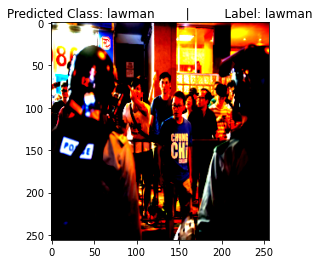

In [101]:
student_model.eval()
for images, labels, annotation in val_loader:
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = student_model(images)
    
    # Assuming you're working with a classification model, find the predicted class index
    predicted = torch.argmax(outputs, dim=1).cpu().numpy()
    predicted_class = predicted[13]
    labels = labels.cpu().numpy()[13]
    annotations = annotation.cpu().numpy()[13]
    # Display the image and its predicted class
    image = images[13].permute(1, 2, 0).cpu().numpy()  # Convert the tensor to a numpy array and adjust dimensions
    plt.imshow(image)
    plt.title(f'Predicted Class: {idx_to_class[predicted_class]}        |         Label: {idx_to_class[labels]}')
    plt.show()
    break  # Stop after displaying the first image


In [102]:
student_model.eval()
for images, labels, annotation in val_loader:
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = student_model(images)
    
    # Assuming you're working with a classification model, find the predicted class index
    predicted = torch.argmax(outputs, dim=1).cpu().numpy()
    labels = labels.cpu().numpy()
    recall = recall_score(labels, predicted, average='weighted')
    break


In [103]:
recall

0.90625

In [90]:
def get_attributes_from_annotations(annotations):
    attributes = set()

    for i in range(len(annotations)):
        if annotations[i][0] != 0:
            attributes.add(idx_to_annot[i])

    return attributes

In [91]:
get_attributes_from_annotations(annotations)

{'age_presentation_young',
 'gender_presentation_fem',
 'hair_color_black',
 'hairtype_straight',
 'lighting_well_lit',
 'skin_tone_3',
 'skin_tone_4',
 'skin_tone_5',
 'visible_torso'}